In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [2]:
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [3]:
def plot(model, num_input_tokens):
    plt.figure(figsize=(10, 4))
    all_num_output_tokens = [1, 2, 4, 8, 16, 32, 64]
    all_runtimes = []
    for i, num_output_tokens in enumerate(all_num_output_tokens[::-1]):
        with open(
            os.path.join(
                "../benchmark_output",
                "runs",
                "ai21",
                (
                    f"synthetic_efficiency:tokenizer=ai21,"
                    f"num_input_tokens={num_input_tokens},"
                    f"num_output_tokens={num_output_tokens},"
                    f"model={model.replace('/', '_')}"
                ),
                "per_instance_metrics.json",
            ),
            "r",
        ) as f:
            runtimes = []
            idealized_runtimes = []
            metrics = json.load(f)
            for instance, metrics in metrics.items():
                for metric in metrics:
                    if metric["name"]["name"] == "inference_idealized_runtime":
                        if len(metric["values"]) > 0:
                            idealized_runtimes.append(metric["values"][0])
                    elif metric["name"]["name"] == "inference_runtime":
                        runtimes.append(metric["values"][0])
            plt.scatter(runtimes, [i + 1 for _ in range(len(runtimes))])
            if len(idealized_runtimes) > 0:
                plt.scatter(idealized_runtimes[0], i+1, marker='X', color='k')
            all_runtimes.append(runtimes)
    plt.yticks(
        list(range(1, len(all_num_output_tokens) + 1)), all_num_output_tokens[::-1]
    )
    plt.xlabel("Runtime (seconds)")
    plt.ylabel("Number of\noutput tokens")
    plt.xlim(0, None)
    print(f"{model}, prompt_size={num_input_tokens}")
    sns.despine()

    plt.savefig(f"../figures/per_instance_runtime_variance/{model.replace('/', '-')},num_input_tokens={num_input_tokens}.pdf",
                bbox_inches="tight")
    plt.show()

ai21/j1-large, prompt_size=1


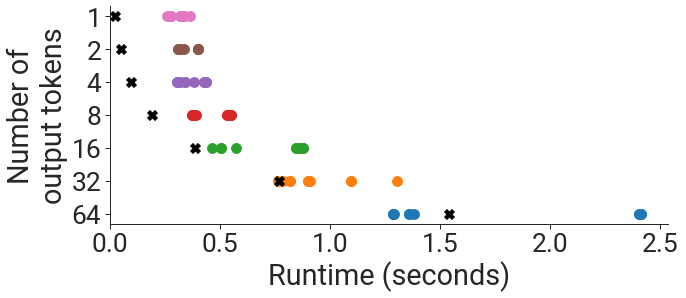

ai21/j1-large, prompt_size=512


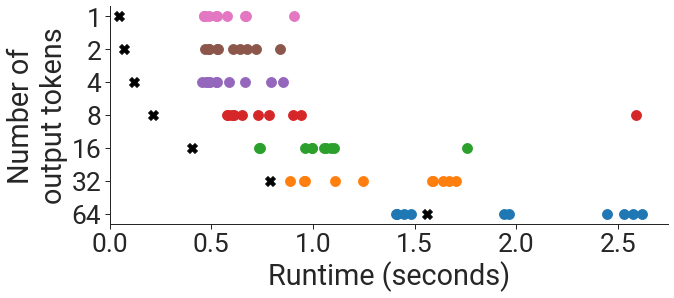

ai21/j1-large, prompt_size=1024


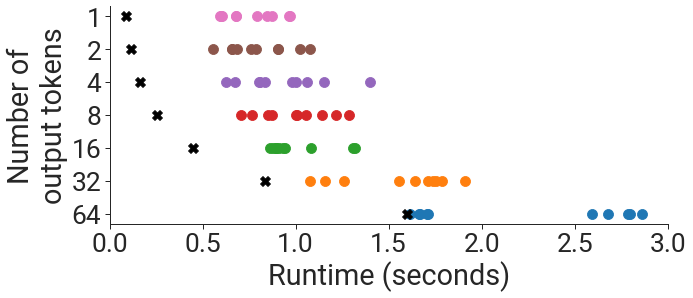

ai21/j1-large, prompt_size=1536


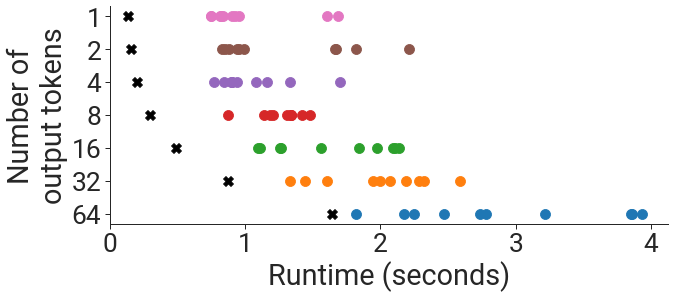

ai21/j1-grande, prompt_size=1


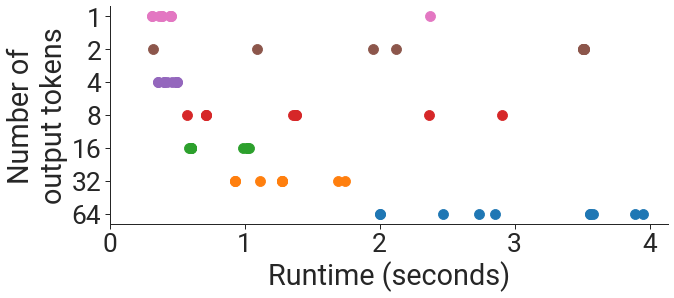

ai21/j1-grande, prompt_size=512


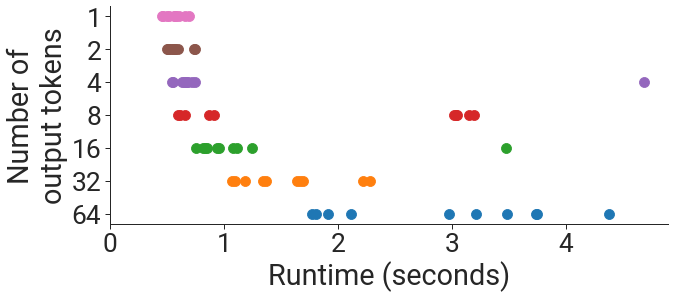

ai21/j1-grande, prompt_size=1024


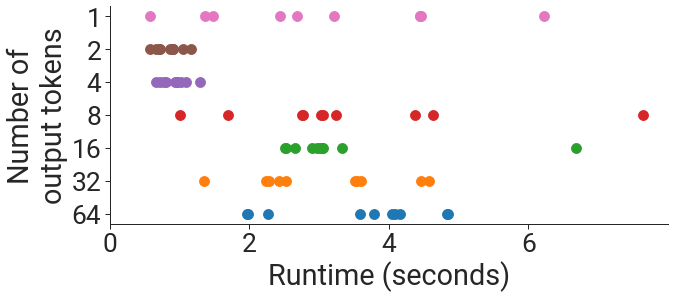

ai21/j1-grande, prompt_size=1536


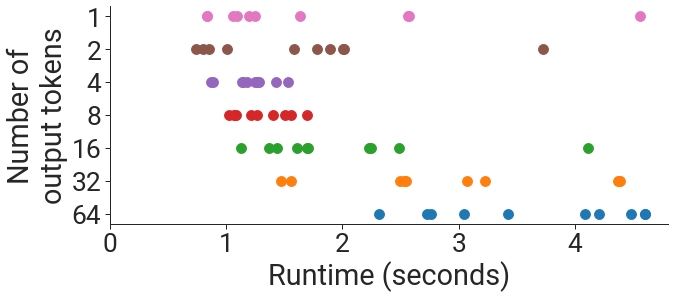

ai21/j1-jumbo, prompt_size=1


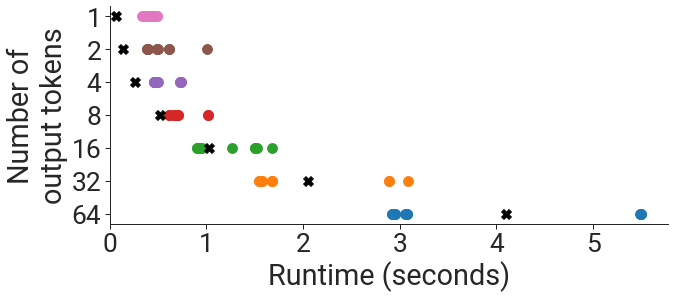

ai21/j1-jumbo, prompt_size=512


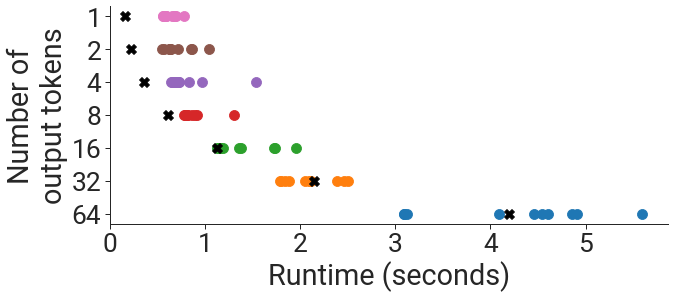

ai21/j1-jumbo, prompt_size=1024


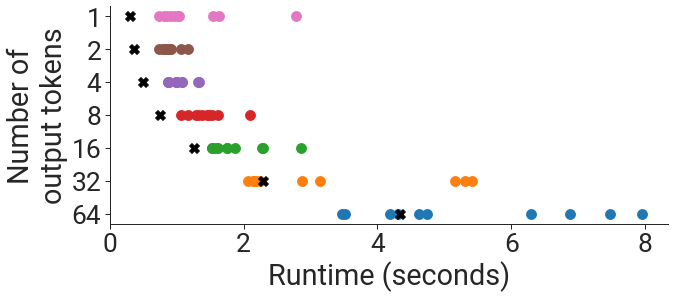

ai21/j1-jumbo, prompt_size=1536


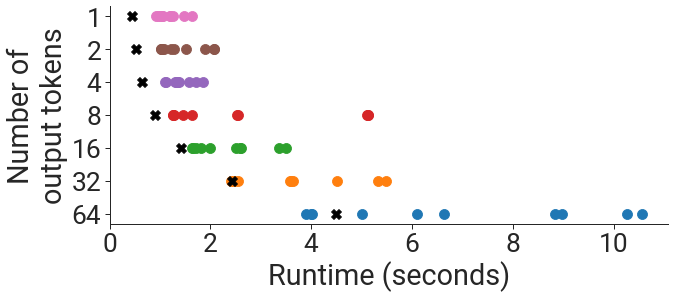

In [4]:
for model in ["ai21/j1-large", "ai21/j1-grande", "ai21/j1-jumbo"]:
    for num_input_tokens in [1, 512, 1024, 1536]:
        plot(model, num_input_tokens)